In [2]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset file
dataset_path = 'ECOMMRecords2020.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
data.head()

,OrderDate,RowID,OrderID,ShipMode,CustomerID,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,Linden 10 Round Wall Clock Black,48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,Howard Miller 11-1/2 Diameter Brentwood Wall C...,474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,Tenex Carpeted Granite-Look or Clear Contempor...,141.420,5,0.6,-187.3815


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.csv' with the path to your dataset file
dataset_path = 'ECOMMRecords2020.csv'
data = pd.read_csv(dataset_path)

# Create new features as done previously
data["Cost"] = (data["Sales"] - data["Profit"])
data["Revenue"] = (data["Profit"] / data["Quantity"])
data["Price"] = (data["Sales"] / data["Quantity"])
data["Margin"] = (data["Profit"] / data["Sales"])

# Step 1: One-hot encode the "Category" feature
data_encoded = pd.get_dummies(data, columns=["Category"], drop_first=True)

# Step 2: Select relevant numerical features for clustering
features = ['Sales', 'Profit', 'Quantity', 'Cost', 'Revenue', 'Price'] + list(data_encoded.columns[data_encoded.columns.str.startswith('Category_')])

# Extract only the selected features
X = data_encoded[features]

# Step 3: Scale the data before applying K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Step 5: Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Step 6: Add the cluster labels to the original dataset for further analysis
data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster labels



Silhouette Score: 0.4166313697706286


For n_clusters = 2, the average silhouette_score is : 0.9363
For n_clusters = 3, the average silhouette_score is : 0.8288
For n_clusters = 4, the average silhouette_score is : 0.8138
For n_clusters = 5, the average silhouette_score is : 0.7574
For n_clusters = 6, the average silhouette_score is : 0.7020
For n_clusters = 7, the average silhouette_score is : 0.6464
For n_clusters = 8, the average silhouette_score is : 0.6660
For n_clusters = 9, the average silhouette_score is : 0.6668
For n_clusters = 10, the average silhouette_score is : 0.6633


/var/folders/7k/3nkpnjw91q347lwnd4y3wxk40000gn/T/ipykernel_44728/3334994329.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(cluster_range, silhouette_scores, 'bo-', color='blue', marker='o')
/var/folders/7k/3nkpnjw91q347lwnd4y3wxk40000gn/T/ipykernel_44728/3334994329.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cluster_range, silhouette_scores, 'bo-', color='blue', marker='o')


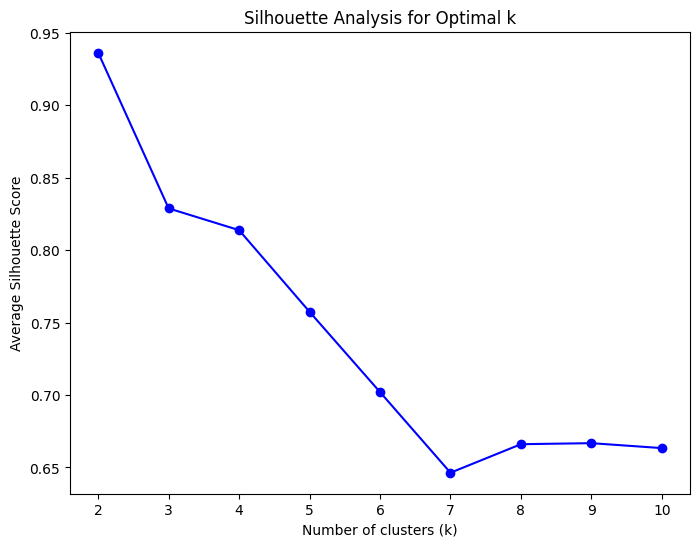

The optimal number of clusters is 2.


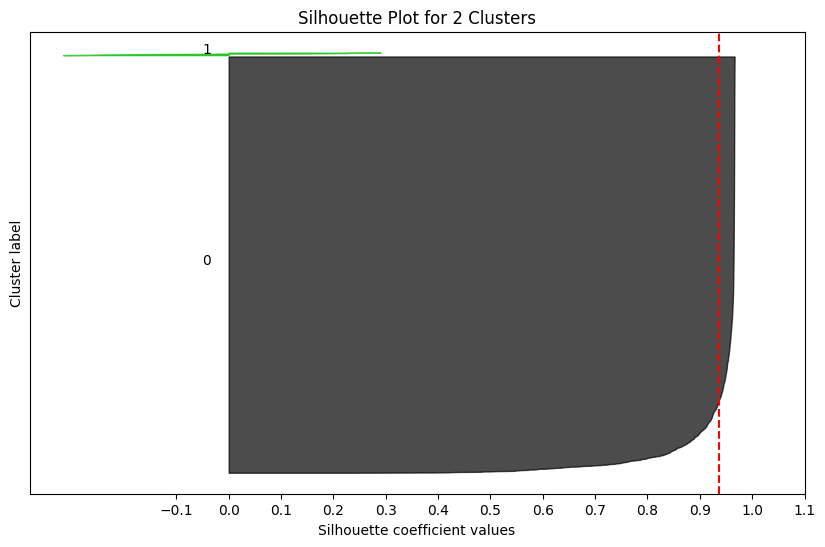

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming 'data' is your DataFrame after feature engineering
# Prepare the feature matrix
features = ['Sales', 'Profit', 'Cost', 'Revenue', 'Price'] 
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Silhouette analysis to find the optimal number of clusters
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-', color='blue', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(cluster_range)
plt.show()

# Choose the optimal number of clusters
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}.")

# Re-run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

# Optionally, create a silhouette plot
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
average_score = silhouette_score(X_scaled, cluster_labels)
ax.axvline(x=average_score, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.1))
plt.title(f"Silhouette Plot for {optimal_k} Clusters")
plt.show()

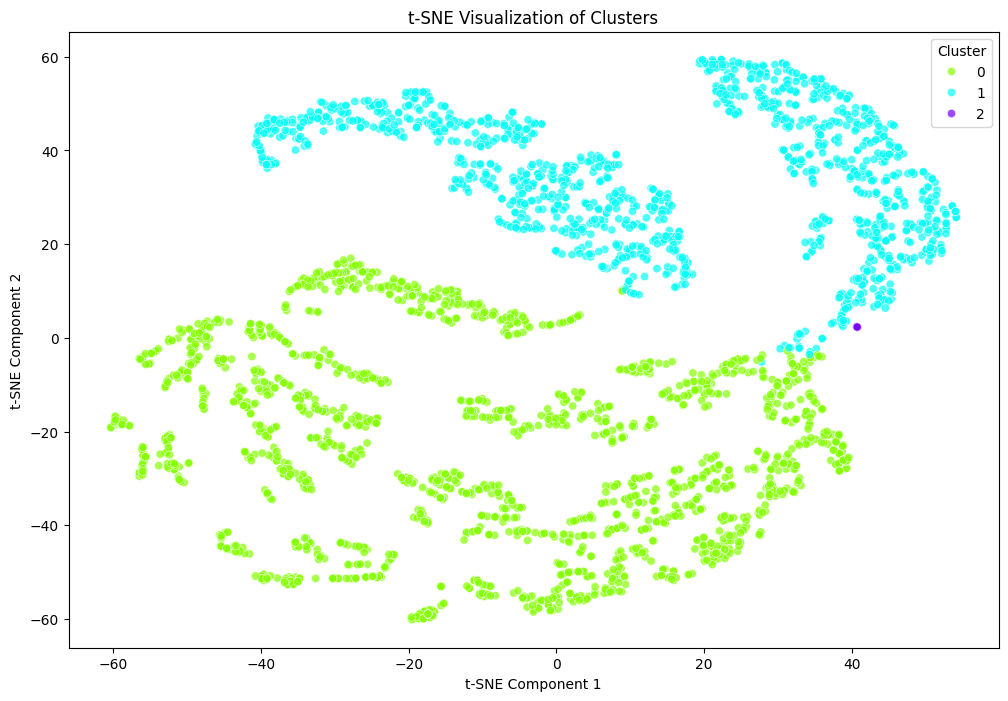

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your data (features and scaling)
features = ['Sales', 'Profit', 'Quantity', 'Cost', 'Revenue', 'Price'] + \
           list(data_encoded.columns[data_encoded.columns.str.startswith('Category_')])
X = data_encoded[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform K-Means clustering
optimal_k = 3  # Replace with your optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

# Step 3: Optional - Reduce dimensions with PCA
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]), random_state=32)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Step 5: Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = data['Cluster'].values

# Step 6: Visualize the clusters with t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('hsv', optimal_k),
    data=tsne_df,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


In [7]:
# Ratios and Interaction Features
data['Gross_Margin'] = data['Profit'] / data['Cost']
data['Sales_per_Cost'] = data['Sales'] / data['Cost']
data['Profit_per_Price'] = data['Profit'] / data['Price']
data['Discounted_Price'] = data['Price'] * (1 - data['Discount'])
data['Total_Discount'] = data['Sales'] * data['Discount']

# Transform Existing Features
for feature in ['Sales', 'Profit', 'Cost', 'Revenue', 'Price']:
    data['Log_' + feature] = np.log1p(data[feature])

# Time-Based Features
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['Day_of_Week'] = data['OrderDate'].dt.dayofweek
data['Month'] = data['OrderDate'].dt.month
data['Quarter'] = data['OrderDate'].dt.quarter
data['Is_Weekend'] = data['Day_of_Week'].isin([5, 6]).astype(int)

# Categorical Encoding
data_encoded = pd.get_dummies(data, columns=['Category', 'ShipMode', 'Segment', 'Region'], drop_first=True)

# Frequency-Based Features
# Drop the existing 'Order_Frequency' column if it exists
if 'Order_Frequency' in data.columns:
    data.drop(columns=['Order_Frequency'], inplace=True)

# Merge the customer order counts
data = data.merge(customer_order_counts, on='CustomerID', how='left')


# Define the new feature list
new_features = [
    'Sales', 'Profit', 'Cost', 'Revenue', 'Price',
    'Gross_Margin', 'Sales_per_Cost', 'Profit_per_Price', 'Discounted_Price',
    'Total_Discount', 'Log_Sales', 'Log_Profit', 'Log_Cost', 'Log_Revenue', 'Log_Price',
    'Day_of_Week', 'Month', 'Quarter', 'Is_Weekend', 'Order_Frequency',
    'Sales_Bin', 'Profit_Bin'
] + list(data_encoded.columns[data_encoded.columns.str.startswith(('Category_', 'ShipMode_', 'Segment_', 'Region_'))])

# Handle any missing values
data_encoded[new_features] = data_encoded[new_features].fillna(0)

# Extract the feature matrix
X = data_encoded[new_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal clusters if not already done
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}.")

# Perform K-Means with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f'Updated Silhouette Score: {silhouette_avg:.4f}')

/Users/nybruker/.pyenv/versions/3.11.5/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'customer_order_counts' is not defined